# Préparation de la donnée

## Imports

In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
pip install alibi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.0 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.23.2
    Uninstalling scikit-image-0.23.2:
      Successfully uninstalled scikit-image-0.23.2


In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=73d07cb69d76dd33e05b707d07316f76f725be40d80d407852331d089834b335
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import numpy as np
import pandas as pd
import re
import time
from sklearn.naive_bayes import MultinomialNB
import random
from collections import defaultdict
from time import perf_counter
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer, StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE, SMOTENC
from alibi.explainers import AnchorTabular
from lime.lime_tabular import LimeTabularExplainer


In [ ]:
colors_palette = sns.color_palette('muted')

## Importation de la source de données

In [ ]:
df = pd.read_excel('./dataset_.xlsx', header=0)

### Exploration des données

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Columns: 104 entries, PUBLIC to DIFFICULTY
dtypes: float64(56), int64(20), object(28)
memory usage: 104.1+ KB


# Traitement des données

## On supprime toute les colonnes calculées

In [ ]:
df.drop(columns=['ENGAGEMENT','COURSE_ACCESS_COUNT_ORIENTED_INVESTMENT','COURSE_ACCESS_CONNECTION_ORIENTED_INVESTMENT','INTERACTION_ORIENTED_INVESTMENT','ACTIVITY_ORIENTED_INVESTMENT','ACTIVITY_ORIENTED_INVESTMENT','AVG_RATING','RANK','DIFF_RANKING_S10Q1','DIFF_RANKING_S8Q1','RANK_S9Q1','DIFF_RANKING_FINAL_EXAM','RANK_FINAL_EXAM','DIFF_RATING_FINAL_EXAM','RANK_S10Q1','DIFF_RATING_S8Q1', 'RANK_S8Q1', 'DIFF_RANKING_S7Q1','DIFF_RATING_S10Q1','DIFF_RANKING_S7Q1','RANK_S4Q1','RANK_S6Q1','RANK_S7Q1','RANK_S5Q1','RANK_S3Q1','RANK_S2Q1','DIFF_RATING_S3Q1','DIFF_RATING_S7Q1','DIFF_RANKING_S9Q1','DIFF_RATING_S9Q1','DIFF_RANKING_S6Q1','DIFF_RATING_S6Q1','DIFF_RANKING_S5Q1','DIFF_RATING_S5Q1','DIFF_RANKING_S4Q1','DIFF_RATING_S4Q1','DIFF_RANKING_S3Q1','DIFF_RANKING_S2Q1','DIFF_RATING_S2Q1','RANK_S1Q1'], inplace=True)

## Transformer les dates

#### On découpe les dates en jour, mois, année, heure, minute et seconde

In [ ]:
liste_date_details = []
temp_dfs = []
liste_dates = [
    "FIRST_COURSE_ACCESS", "LAST_COURSE_ACCESS",
    "FIRST_S1Q1_EXE_SUBMISSION", "LAST_S1Q1_EXE_SUBMISSION",
    "FIRST_S2Q1_EXE_SUBMISSION", "LAST_S2Q1_EXE_SUBMISSION",
    "FIRST_S3Q1_EXE_SUBMISSION", "LAST_S3Q1_EXE_SUBMISSION",
    "FIRST_S4Q1_EXE_SUBMISSION", "LAST_S4Q1_EXE_SUBMISSION",
    "FIRST_S5Q1_EXE_SUBMISSION", "LAST_S5Q1_EXE_SUBMISSION",
    "FIRST_S6Q1_EXE_SUBMISSION", "LAST_S6Q1_EXE_SUBMISSION",
    "FIRST_S7Q1_EXE_SUBMISSION", "LAST_S7Q1_EXE_SUBMISSION",
    "FIRST_S8Q1_EXE_SUBMISSION", "LAST_S8Q1_EXE_SUBMISSION",
    "FIRST_S9Q1_EXE_SUBMISSION", "LAST_S9Q1_EXE_SUBMISSION",
    "FIRST_S10Q1_EXE_SUBMISSION", "LAST_S10Q1_EXE_SUBMISSION",
    "FIRST_FE_EXE_SUBMISSION", "LAST_FE_EXE_SUBMISSION"
]

for date in liste_dates:
    df[date] = pd.to_datetime(df[date], errors='coerce', utc=True).dt.strftime('%y/%m/%d %H:%M:%S PM')
    df[date] = pd.to_datetime(df[date], format="%y/%m/%d %H:%M:%S PM",  errors='coerce')

    temp_df = pd.DataFrame(index=df.index)
    temp_df[f'{date}_year'] = df[date].dt.year
    temp_df[f'{date}_month'] = df[date].dt.month
    temp_df[f'{date}_day'] = df[date].dt.day
    temp_df[f'{date}_hour'] = df[date].dt.hour
    temp_df[f'{date}_minute'] = df[date].dt.minute
    temp_df[f'{date}_second'] = df[date].dt.second

    liste_date_details.append([f'{date}_year'])
    liste_date_details.append([f'{date}_month'])
    liste_date_details.append([f'{date}_day'])
    liste_date_details.append([f'{date}_hour'])
    liste_date_details.append([f'{date}_minute'])
    liste_date_details.append([f'{date}_second'])
    temp_dfs.append(temp_df)
df_final = pd.concat([df] + temp_dfs, axis=1)
df_final.drop(columns=liste_dates, inplace=True)

df = df_final.copy()


### Remplacer les valeurs null par '-1'

In [ ]:
df.fillna(-1, inplace=True)

### Mise à l'echelle des données

#### Mise à l'échelle avec Min Max scaler

In [ ]:
df_min_max_scaler = df.copy(deep=True)
# df_only_min_max_scaler = df.copy(deep=True)
columns_to_scale = [['COURSE_ACCESS_CONNECTION'],['S8Q1_EXE_SUBMISSION_COUNT'],['S7Q1_EXE_SUBMISSION_COUNT'],['S8Q1_EXE_SUBMISSION_COUNT'], ['TOTAL_STUDENTS_NUMBER.11'], ['FE_EXE_SUBMISSION_COUNT'], ['RATING_FINAL_EXAM'], ['S10Q1_EXE_SUBMISSION_COUNT'],['TOTAL_STUDENTS_NUMBER.10'],['TOTAL_STUDENTS_NUMBER.9'],['RATING_S10Q1'],['S9Q1_EXE_SUBMISSION_COUNT'],['RATING_S9Q1'],['RATING_S8Q1'], ['TOTAL_STUDENTS_NUMBER.8'],['RATING_S7Q1'],['S6Q1_EXE_SUBMISSION_COUNT'], ['COURSE_ACCESS_MINUTES'],['RATING_S6Q1'],['TOTAL_STUDENTS_NUMBER.6'],['TOTAL_STUDENTS_NUMBER.7'],['S5Q1_EXE_SUBMISSION_COUNT'],['TOTAL_STUDENTS_NUMBER.3'],['RATING_S4Q1'],['TOTAL_STUDENTS_NUMBER.4'],['S4Q1_EXE_SUBMISSION_COUNT'],['RATING_S5Q1'],['S3Q1_EXE_SUBMISSION_COUNT'],['S2Q1_EXE_SUBMISSION_COUNT'],['RATING_S3Q1'],['COURSE_INTERACTIONS'],['T_EXE_SUBMISSION_COUNT'],['RATING_S1Q1'],['TOTAL_STUDENTS_NUMBER'],['RATING_S2Q1'],['TOTAL_STUDENTS_NUMBER.5'],['TOTAL_STUDENTS_NUMBER.2'] ,['S1Q1_EXE_SUBMISSION_COUNT']]

scaler = MinMaxScaler(feature_range=(0, 1))

for col in liste_date_details:
    df_min_max_scaler[col] = scaler.fit_transform(df_min_max_scaler[col])
for col in columns_to_scale:
    df_min_max_scaler[col] = scaler.fit_transform(df_min_max_scaler[col])

# for col in liste_date_details:
#     df_only_min_max_scaler[col] = scaler.fit_transform(df_min_max_scaler[col])
# for col in columns_to_scale:
#     df_only_min_max_scaler[col] = scaler.fit_transform(df_min_max_scaler[col])

pd.set_option('display.max_columns', None)


#### Mise à l'échelle avec standart scaler

In [ ]:
df_standard_scaler = df.copy(deep=True)
scaler_standard_scaler = StandardScaler()

for col in liste_date_details:
    df_standard_scaler[col] = scaler_standard_scaler.fit_transform(df_standard_scaler[col])

for col in columns_to_scale:
    df_standard_scaler[col] = scaler_standard_scaler.fit_transform(df_standard_scaler[col])


In [ ]:
dfs_scaler = [df_min_max_scaler, df_standard_scaler]

### Normalisation les données

#### Toutes les données de type int ou float sont ciblées

In [ ]:
dfs_scaled_normalized = []

In [ ]:


for dataframe in dfs_scaler:
    df_numeric = dataframe.select_dtypes(include=['int64', 'float64']).drop(columns=['DIFFICULTY_encoded'], errors='ignore')
    df_difficulty = dataframe[['DIFFICULTY_encoded']] if 'DIFFICULTY_encoded' in dataframe.columns else pd.DataFrame()
    df_non_numeric = dataframe.select_dtypes(exclude=['int64', 'float64'])

    normalizer_L1 = Normalizer(norm='l1')
    normalized_data_L1 = normalizer_L1.fit_transform(df_numeric)
    df_normalized_numeric_L1 = pd.DataFrame(normalized_data_L1, columns=df_numeric.columns)
    df_concatenated_L1 = pd.concat([df_normalized_numeric_L1, df_difficulty, df_non_numeric], axis=1)
    df_L1 = df_concatenated_L1.loc[:, ~df_concatenated_L1.columns.duplicated()].reindex(columns=dataframe.columns)

    dfs_scaled_normalized.append(df_L1)

for dataframe in dfs_scaler:
    df_numeric = dataframe.select_dtypes(include=['int64', 'float64']).drop(columns=['DIFFICULTY_encoded'], errors='ignore')
    df_difficulty = dataframe[['DIFFICULTY_encoded']] if 'DIFFICULTY_encoded' in dataframe.columns else pd.DataFrame()
    df_non_numeric = dataframe.select_dtypes(exclude=['int64', 'float64'])

    normalizer_L2 = Normalizer(norm='l2')
    normalized_data_L2 = normalizer_L2.fit_transform(df_numeric)
    df_normalized_numeric_L2 = pd.DataFrame(normalized_data_L2, columns=df_numeric.columns)
    df_concatenated_L2 = pd.concat([df_normalized_numeric_L2, df_difficulty, df_non_numeric], axis=1)
    df_L2 = df_concatenated_L2.loc[:, ~df_concatenated_L2.columns.duplicated()].reindex(columns=dataframe.columns)

    dfs_scaled_normalized.append(df_L2)


##### Liste des Dataframes
1. MinMaxScaler + L1 Normalizer
2. MinMaxScaler + L2 Normalizer
3. Standard Scaler + L1 Normalizer
4. Standard Scaler + L2 Normalizer

## Encoder les strings

##### Label encoder est utilisé pour les étiquettes de profillage étudiants (E+P+, E-P+, E+P- et E-P-)

##### On a désormais 4 dataframes pour tester laquelle des deux normalisations et des scalers sont les plus efficaces

In [ ]:

list_caracteristique_string = ['DIFFICULTY']

for elem in list_caracteristique_string:
    encoder = LabelEncoder()
for dataframe in dfs_scaled_normalized:
    dataframe[elem + '_encoded'] = encoder.fit_transform(dataframe[elem])
    dataframe.drop(columns=[elem], inplace=True)




#### Le One Hot encoder est utiliser pour les autres variables texte qui ne sont pas les étiquettes

In [ ]:
list_caracteristique_string = ['PUBLIC', 'COURSE_NAME', 'ACADEMIC_Y']

for i in range(len(dfs_scaled_normalized)):
    for elem in list_caracteristique_string:
        if elem in dfs_scaled_normalized[i].columns:
            one_hot_encoded = pd.get_dummies(dfs_scaled_normalized[i][elem], prefix=elem)
            dfs_scaled_normalized[i] = pd.concat([dfs_scaled_normalized[i], one_hot_encoded], axis=1)
    dfs_scaled_normalized[i].drop(columns=[col for col in list_caracteristique_string if col in dfs_scaled_normalized[i].columns], inplace=True)




### Distribution de classes

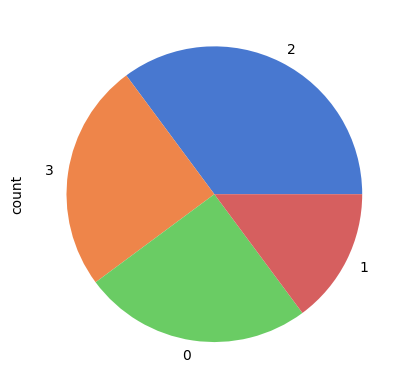

DIFFICULTY_encoded
2    45
3    32
0    32
1    19
Name: count, dtype: int64


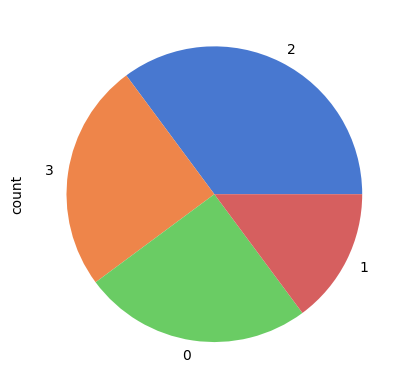

DIFFICULTY_encoded
2    45
3    32
0    32
1    19
Name: count, dtype: int64


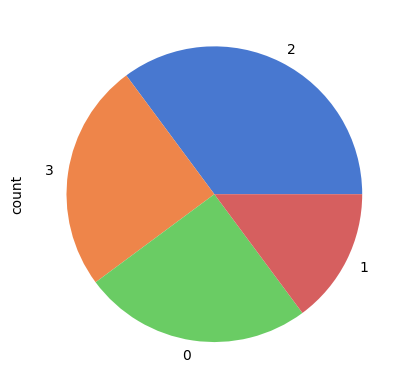

DIFFICULTY_encoded
2    45
3    32
0    32
1    19
Name: count, dtype: int64


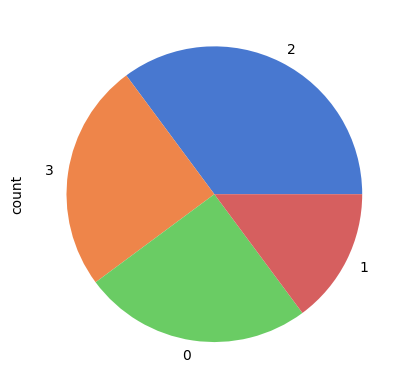

DIFFICULTY_encoded
2    45
3    32
0    32
1    19
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

# for df in dfs_scaled_normalized:
#     df['DIFFICULTY_encoded'].value_counts().plot.pie()
#     plt.show()
#     target = df['DIFFICULTY_encoded']
#     print (df['DIFFICULTY_encoded'].value_counts())
#c'est la même répartition pour les 4 data frame

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

for df in dfs_scaled_normalized:
    colors = sns.color_palette('muted')

    df['DIFFICULTY_encoded'].value_counts().plot.pie(colors=colors)

    plt.show()

    target = df['DIFFICULTY_encoded']
    print(df['DIFFICULTY_encoded'].value_counts())


##### il y a un problème dans la distribution des classes, la distribution est innégale

### Aggrandit le nombre de données grace à SMOTE

In [ ]:
balanced_dfs = []
list_caracteristique_string = ['PUBLIC_BTS_SIO SLAM ', 'PUBLIC_E3IN ', 'PUBLIC_M2I,IA BIG DATA  ', 'PUBLIC_M2I_GREEN', 'COURSE_NAME_Python', 'ACADEMIC_Y_2021_2022']
for df in dfs_scaled_normalized:
    Difficulty = df['DIFFICULTY_encoded'].values
    features = df.drop('DIFFICULTY_encoded', axis=1)

    categorical_features_indices = [features.columns.get_loc(name) for name in list_caracteristique_string]

    smotenc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)

    features_resampled, difficulty_resampled = smotenc.fit_resample(features, Difficulty)

    balanced_df = pd.DataFrame(features_resampled, columns=features.columns)
    balanced_df['DIFFICULTY_encoded'] = difficulty_resampled

    balanced_dfs.append(balanced_df)



<ipython-input-18-628f0858c689>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  balanced_df['DIFFICULTY_encoded'] = difficulty_resampled
<ipython-input-18-628f0858c689>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  balanced_df['DIFFICULTY_encoded'] = difficulty_resampled
<ipython-input-18-628f0858c689>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

#### Nouvelle distributions des classes

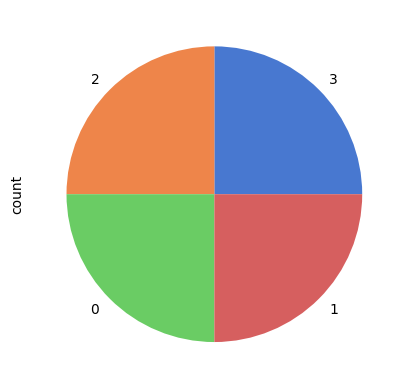

DIFFICULTY_encoded
3    45
2    45
0    45
1    45
Name: count, dtype: int64


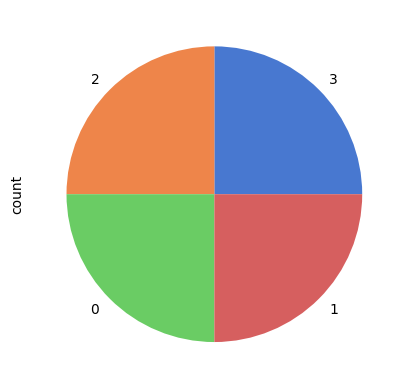

DIFFICULTY_encoded
3    45
2    45
0    45
1    45
Name: count, dtype: int64


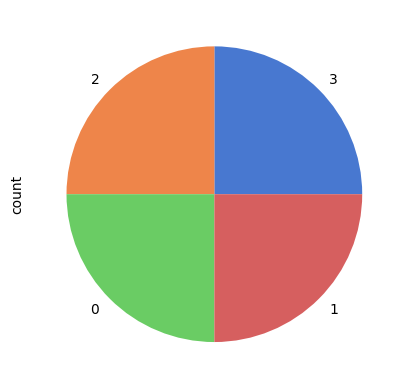

DIFFICULTY_encoded
3    45
2    45
0    45
1    45
Name: count, dtype: int64


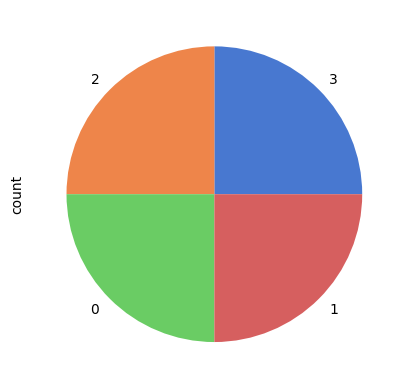

DIFFICULTY_encoded
3    45
2    45
0    45
1    45
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
for df in balanced_dfs:
    df['DIFFICULTY_encoded'].value_counts().plot.pie(colors=colors)
    plt.show()
    target = df['DIFFICULTY_encoded']
    print (df['DIFFICULTY_encoded'].value_counts())


#### il y a désormais un équilibrage dans la répartition des classes

#### On s'assure que les jeux d'entrainements et les jeux de tests comportent les mêmes proportions de classes

In [ ]:

data = {}
index = 1
for balanced_df in balanced_dfs :

    balanced_df = balanced_df.astype(float)
    y = balanced_df['DIFFICULTY_encoded']
    balanced_df.drop(columns=['DIFFICULTY_encoded'], inplace=True)

    X = balanced_df

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    data[f"df_{index}"] = {
        "df": balanced_df,
        "X": X,
        "Y": y,
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    }
    index += 1
    print("Distribution des classes dans l'ensemble d'entraînement :")
    print(y_train.value_counts(normalize=True))
    print("Distribution des classes dans l'ensemble de test :")
    print(y_test.value_counts(normalize=True))





Distribution des classes dans l'ensemble d'entraînement :
DIFFICULTY_encoded
1.0    0.253968
3.0    0.253968
0.0    0.246032
2.0    0.246032
Name: proportion, dtype: float64
Distribution des classes dans l'ensemble de test :
DIFFICULTY_encoded
0.0    0.259259
2.0    0.259259
1.0    0.240741
3.0    0.240741
Name: proportion, dtype: float64
Distribution des classes dans l'ensemble d'entraînement :
DIFFICULTY_encoded
1.0    0.253968
3.0    0.253968
0.0    0.246032
2.0    0.246032
Name: proportion, dtype: float64
Distribution des classes dans l'ensemble de test :
DIFFICULTY_encoded
0.0    0.259259
2.0    0.259259
1.0    0.240741
3.0    0.240741
Name: proportion, dtype: float64
Distribution des classes dans l'ensemble d'entraînement :
DIFFICULTY_encoded
1.0    0.253968
3.0    0.253968
0.0    0.246032
2.0    0.246032
Name: proportion, dtype: float64
Distribution des classes dans l'ensemble de test :
DIFFICULTY_encoded
0.0    0.259259
2.0    0.259259
1.0    0.240741
3.0    0.240741
Name: prop

## Entrainement des models

#### On défini un ensemble de model qui seront utilisé par la suite pour tester les explicabilité

In [ ]:
base_model = DecisionTreeClassifier(random_state=42)
models = [
    {"name": "SVM", "model": SVC(probability=True,C=10, random_state=42)},
    {"name": "Logistic Regression", "model": LogisticRegression(C=10.0, penalty='l2', max_iter=1000, random_state=42)},
    {"name": "Decision Tree", "model": DecisionTreeClassifier(min_samples_split=2, max_depth=2, random_state=42)},
    {"name": "k-Nearest Neighbors", "model": KNeighborsClassifier(n_neighbors=2)},
    {"name": "Naïve Bayes", "model": MultinomialNB()},
    {"name": "RandomForest", "model": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)},
    {"name": "Extra Trees", "model": ExtraTreesClassifier(n_estimators=100, max_depth=10, random_state=42)},
    {"name": "BAG", "model": BaggingClassifier(estimator=base_model, n_estimators=10, random_state=42)},
    {"name": "Gradient Boosting", "model": GradientBoostingClassifier(n_estimators=250, max_depth=5, random_state=42)},
    {"name": "MLP", "model": MLPClassifier(hidden_layer_sizes=(50,50,50), activation='tanh', max_iter=800, random_state=42)}
]

#### On entraîne tout les models et on affiche leurs matrices de confusion et leurs précisions

In [ ]:
import pandas as pd
import time
from sklearn.metrics import precision_score, confusion_matrix

list_model_need_values = ['Extra Trees']

results = {indice: {} for indice in data.keys()}
training_times = {indice: {} for indice in data.keys()}

for indice, elem in data.items():
    X_train = elem["X_train"]
    X_test = elem["X_test"]
    y_train = elem["y_train"]
    y_test = elem["y_test"]

    for model_info in models:
        model = model_info["model"]
        name = model_info["name"]
        if name == "Naïve Bayes" and (indice == "df_2" or indice == "df_4"):
          continue
        else:
          print(indice)
          print(name)

          start_time = time.time()
          model.fit(X_train, y_train)
          end_time = time.time()

        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred, average='micro')
        model_info["precision " + indice] = precision

        if name not in results[indice]:
            results[indice][name] = precision
            training_times[indice][name] = end_time - start_time
        else:
            results[indice][name] = max(results[indice][name], precision)
            training_times[indice][name] = min(training_times[indice][name], end_time - start_time)

df_results = pd.DataFrame(results)
df_training_times = pd.DataFrame(training_times)

print("Précision des modèles :")
print(df_results)
print("\nTemps d'entraînement des modèles (en secondes) :")
print(df_training_times)


df_1
SVM
df_1
Logistic Regression
df_1
Decision Tree
df_1
k-Nearest Neighbors
df_1
Naïve Bayes
df_1
RandomForest
df_1
Extra Trees
df_1
BAG
df_1
Gradient Boosting
df_1
MLP
df_2
SVM
df_2
Logistic Regression
df_2
Decision Tree
df_2
k-Nearest Neighbors
df_2
RandomForest
df_2
Extra Trees
df_2
BAG
df_2
Gradient Boosting
df_2
MLP
df_3
SVM
df_3
Logistic Regression
df_3
Decision Tree
df_3
k-Nearest Neighbors
df_3
Naïve Bayes
df_3
RandomForest
df_3
Extra Trees
df_3
BAG
df_3
Gradient Boosting
df_3
MLP
df_4
SVM
df_4
Logistic Regression
df_4
Decision Tree
df_4
k-Nearest Neighbors
df_4
RandomForest
df_4
Extra Trees
df_4
BAG
df_4
Gradient Boosting
df_4
MLP
Précision des modèles :
                         df_1      df_2      df_3      df_4
SVM                  0.611111  0.425926  0.666667  0.722222
Logistic Regression  0.685185  0.500000  0.722222  0.722222
Decision Tree        0.796296  0.518519  0.611111  0.500000
k-Nearest Neighbors  0.722222  0.722222  0.703704  0.759259
Naïve Bayes          0.500

##### On cherche avec lequel dataframe on a eu les meilleurs résultats

In [ ]:
count = {i: 0 for i in range(1, 5)}
sum_precision = {i: 0 for i in range(1, 5)}

print(models)

for model_info in models:
    print(f'{model_info["name"]} : ')
    max_p = 0
    dfi = 0
    for i in range(1, 5):
        if model_info["name"] == "Naïve Bayes" and (i == 2 or i == 4):
            continue
        else:
            current_val = model_info[f'precision df_{i}']
            sum_precision[i] += current_val
            if current_val > max_p:
                max_p = current_val
                dfi = i

    count[dfi] += 1
    print(f'Meilleur data frame --> {dfi} pour p {round(max_p, 2)}\n')

for a in range(1, 5):
    print("Dataframe :", a, " nbr de meilleure précision -->", count[a], ", moyenne -->", round(sum_precision[a] / 10, 3))


[{'name': 'SVM', 'model': SVC(C=10, probability=True, random_state=42), 'precision df_1': 0.6111111111111112, 'precision df_2': 0.42592592592592593, 'precision df_3': 0.6666666666666666, 'precision df_4': 0.7222222222222222}, {'name': 'Logistic Regression', 'model': LogisticRegression(C=10.0, max_iter=1000, random_state=42), 'precision df_1': 0.6851851851851852, 'precision df_2': 0.5, 'precision df_3': 0.7222222222222222, 'precision df_4': 0.7222222222222222}, {'name': 'Decision Tree', 'model': DecisionTreeClassifier(max_depth=2, random_state=42), 'precision df_1': 0.7962962962962963, 'precision df_2': 0.5185185185185185, 'precision df_3': 0.6111111111111112, 'precision df_4': 0.5}, {'name': 'k-Nearest Neighbors', 'model': KNeighborsClassifier(n_neighbors=2), 'precision df_1': 0.7222222222222222, 'precision df_2': 0.7222222222222222, 'precision df_3': 0.7037037037037037, 'precision df_4': 0.7592592592592593}, {'name': 'Naïve Bayes', 'model': MultinomialNB(), 'precision df_1': 0.5, 'pre

##### Le dataframe (1) avec MinMaxScaler + L2 Normalizer est le plus performant dans 50% des models

##### Le dataframe (1) avec Standard Scaler + L2 Normalizer à la moyenne de precision la plus elevée sur l'ensemble des models 75,7%

###### On garde seulement le model extraTree résultat le plus performant via le dataframe 1 + les models dit explicable (Niave Bayes, Decision Tree, Logictic Regression)

##### on retient donc les valeurs deu X'e dataframe

In [ ]:
X_train = data['df_1']['X_train']
X_test = data['df_1']['X_test']
y_train = data['df_1']['y_train']
y_test = data['df_1']['y_test']

In [ ]:
labels_source = ['E+P+', 'E-P+','E+P-', 'E-P-']
labels_index = [0,1,2,3]

## Decision Tree

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
instance_index = 23
explanations_time = 0

for model in models :
    if model["name"] == "Decision Tree" :
        start_time = time.time()
        model["model"].fit(X_train, y_train)
        plt.figure(figsize=(40, 20),dpi=400)
        plot_tree(model["model"], feature_names= X_train.columns, class_names=labels_source)
        plt.show()
        end_time = time.time()
        explanations_time = end_time - start_time
        print (explanations_time)

7.565871238708496


Probabilités a priori des classes: [-1.4022947 -1.370546  -1.4022947 -1.370546 ]
[[-5.62979771 -5.68428306 -5.6607873  -5.71002488 -5.42969226 -5.58788525
  -5.62083656 -5.43650198 -3.41788369 -5.70596109 -5.44161795 -5.58788525
  -5.70354385 -5.52951331 -5.56205608 -5.68034488 -5.54459254 -5.58825079
  -5.70186106 -5.58956977 -5.58825079 -5.71688714 -5.67983888 -5.64867479
  -5.71719837 -5.68861652 -5.64867479 -5.71256288 -5.65597404 -5.63790511
  -5.72243839 -5.66111192 -5.63790511 -5.72213365 -5.70763346 -5.70150502
  -5.70150502 -5.58788525 -5.42473637 -5.56009049 -5.58043327 -5.6704355
  -5.60837641 -5.59538718 -5.39663031 -5.54479998 -5.55251002 -5.59216978
  -5.57194036 -5.5790916  -5.39666074 -5.57622895 -5.51880757 -5.66715407
  -5.59483537 -5.52978701 -5.39665852 -5.57588944 -5.52751006 -5.64352791
  -5.58379428 -5.5366868  -5.40131761 -5.5842734  -5.5303453  -5.66880371
  -5.51819589 -5.56747853 -5.40348355 -5.58561054 -5.53107708 -5.6683834
  -5.53663795 -5.5605712  -5.3966

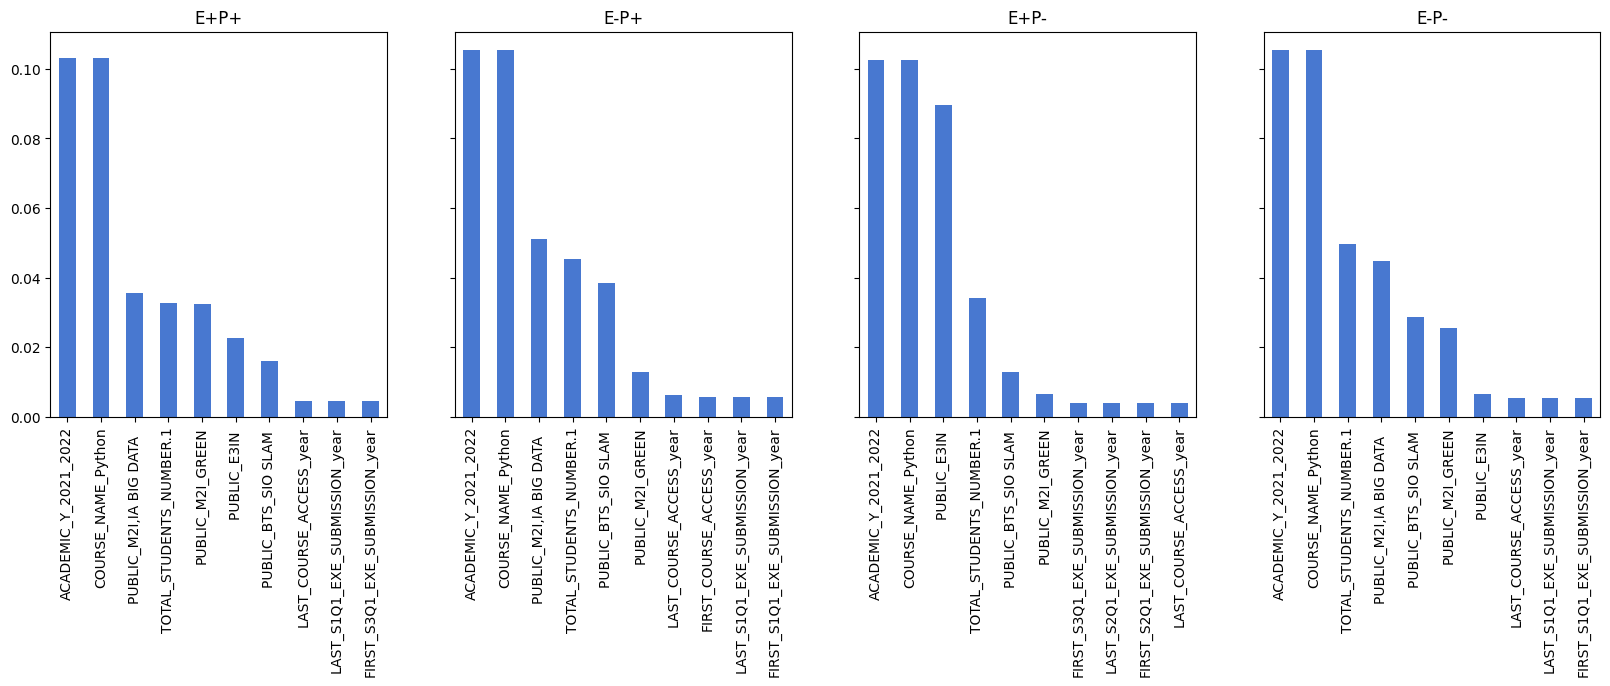

2.1670196056365967


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import seaborn as sns
import pandas as pd
instance_index = 23

for model in models :
    if model["name"] == "Naïve Bayes" :
        modelNB =  model["model"]
        modelNB.fit(X_train, y_train)

        print("Probabilités a priori des classes:", modelNB.class_log_prior_)

        print(modelNB.feature_log_prob_)
        start_time = time.time()
        if hasattr(modelNB, 'feature_log_prob_'):
            feature_probs = np.exp(modelNB.feature_log_prob_)
            features = X_train.columns
            probs_df = pd.DataFrame(feature_probs, columns=features)

            fig, axes = plt.subplots(nrows=1, ncols=probs_df.shape[0], figsize=(20, 5), sharey=True)
            for i, ax in enumerate(axes):
                probs = probs_df.iloc[i].sort_values(ascending=False)[:10]
                probs.plot(kind='bar', ax=ax, title=f'{labels_source[i]}',color=colors_palette[0])
            plt.show()
            end_time = time.time()
            explanations_time = end_time - start_time
            print(explanations_time)

### Logistic Regression

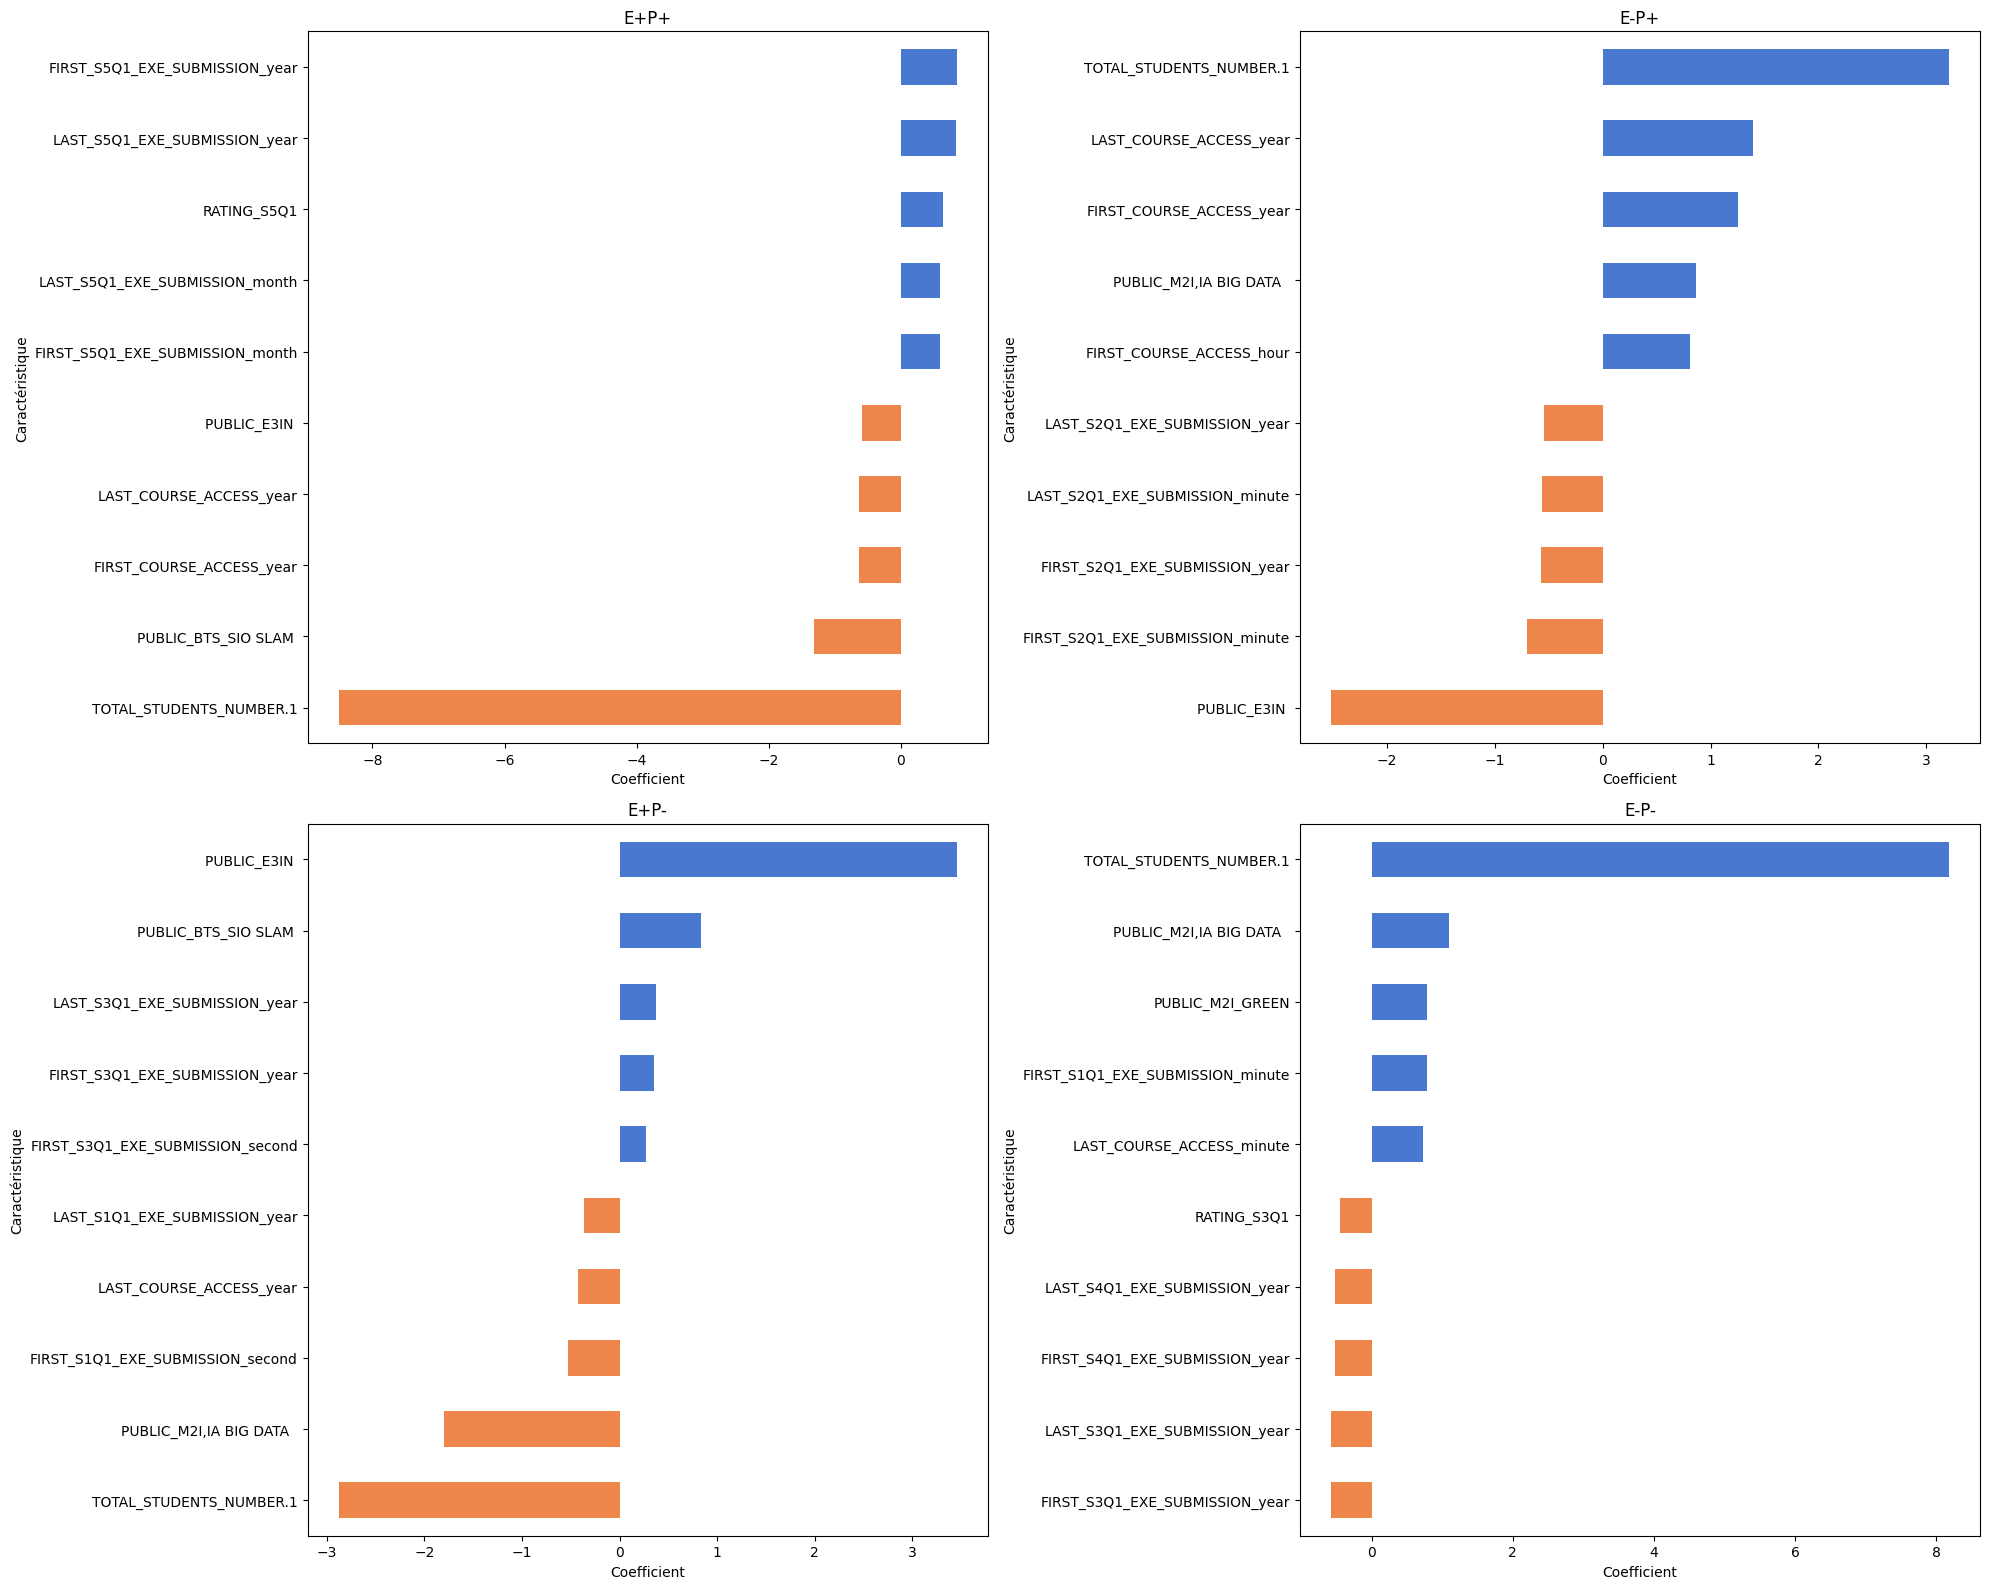

Intercept du modèle : 4.146988094998432
2.5635082721710205


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

fig, axs = plt.subplots(2,2, figsize=(20, 16))
axs = axs.flatten()
colors = sns.color_palette('muted')
for model in models:
    if model["name"] == "Logistic Regression":
        modelRL = model["model"]
        modelRL.fit(X_train, y_train)

        start_time = time.time()
        for i in range(len(labels_source)):
            coefficients = modelRL.coef_[i]
            features = X_train.columns

            coef_df = pd.DataFrame(coefficients, index=features, columns=['Coefficient'])

            top_positives = coef_df.nlargest(5, 'Coefficient')
            top_negatives = coef_df.nsmallest(5, 'Coefficient')
            top_coefficients = pd.concat([top_positives, top_negatives])

            top_coefficients = top_coefficients.sort_values(by='Coefficient', ascending=True)

            colors_palette = sns.color_palette('muted')

            colors = [colors_palette[1] if c < 0 else colors_palette[0] for c in top_coefficients['Coefficient']]

            top_coefficients['Coefficient'].plot(kind='barh', color=colors, ax=axs[i])
            axs[i].set_title(labels_source[i])
            axs[i].set_xlabel('Coefficient')
            axs[i].set_ylabel('Caractéristique')

        plt.tight_layout()
        plt.savefig('RLexplaination.png')
        plt.show()

        print("Intercept du modèle :", modelRL.intercept_[0])

        y_pred = modelRL.predict(X_test)
        y_proba = modelRL.predict_proba(X_test)[:, 1]
        end_time = time.time()
        explanations_time = end_time - start_time
        print(explanations_time)

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import ExtraTreesClassifier
# import numpy as np
# from lime.lime_tabular import LimeTabularExplainer
# import matplotlib.pyplot as plt

# dfexplainable = pd.read_excel('./dataset_.xlsx', header=0)

# dfexplainable.drop(columns=[
#     'ENGAGEMENT','COURSE_ACCESS_COUNT_ORIENTED_INVESTMENT','COURSE_ACCESS_CONNECTION_ORIENTED_INVESTMENT',
#     'INTERACTION_ORIENTED_INVESTMENT','ACTIVITY_ORIENTED_INVESTMENT','ACTIVITY_ORIENTED_INVESTMENT',
#     'AVG_RATING','RANK','DIFF_RANKING_S10Q1','DIFF_RANKING_S8Q1','RANK_S9Q1','DIFF_RANKING_FINAL_EXAM',
#     'RANK_FINAL_EXAM','DIFF_RATING_FINAL_EXAM','RANK_S10Q1','DIFF_RATING_S8Q1', 'RANK_S8Q1',
#     'DIFF_RANKING_S7Q1','DIFF_RATING_S10Q1','DIFF_RANKING_S7Q1','RANK_S4Q1','RANK_S6Q1','RANK_S7Q1',
#     'RANK_S5Q1','RANK_S3Q1','RANK_S2Q1','DIFF_RATING_S3Q1','DIFF_RATING_S7Q1','DIFF_RANKING_S9Q1',
#     'DIFF_RATING_S9Q1','DIFF_RANKING_S6Q1','DIFF_RATING_S6Q1','DIFF_RANKING_S5Q1','DIFF_RATING_S5Q1',
#     'DIFF_RANKING_S4Q1','DIFF_RATING_S4Q1','DIFF_RANKING_S3Q1','DIFF_RANKING_S2Q1','DIFF_RATING_S2Q1',
#     'RANK_S1Q1'], inplace=True)

# dfexplainable.fillna(-1, inplace=True)

# liste_dates = ["FIRST_COURSE_ACCESS", "LAST_COURSE_ACCESS",
#                "FIRST_S1Q1_EXE_SUBMISSION", "LAST_S1Q1_EXE_SUBMISSION",
#                "FIRST_S2Q1_EXE_SUBMISSION", "LAST_S2Q1_EXE_SUBMISSION",
#                "FIRST_S3Q1_EXE_SUBMISSION", "LAST_S3Q1_EXE_SUBMISSION",
#                "FIRST_S4Q1_EXE_SUBMISSION", "LAST_S4Q1_EXE_SUBMISSION",
#                "FIRST_S5Q1_EXE_SUBMISSION", "LAST_S5Q1_EXE_SUBMISSION",
#                "FIRST_S6Q1_EXE_SUBMISSION", "LAST_S6Q1_EXE_SUBMISSION",
#                "FIRST_S7Q1_EXE_SUBMISSION", "LAST_S7Q1_EXE_SUBMISSION",
#                "FIRST_S8Q1_EXE_SUBMISSION", "LAST_S8Q1_EXE_SUBMISSION",
#                "FIRST_S9Q1_EXE_SUBMISSION", "LAST_S9Q1_EXE_SUBMISSION",
#                "FIRST_S10Q1_EXE_SUBMISSION", "LAST_S10Q1_EXE_SUBMISSION",
#                "FIRST_FE_EXE_SUBMISSION", "LAST_FE_EXE_SUBMISSION"]

# liste_date_details = []
# temp_dfs = []

# for date in liste_dates:
#     dfexplainable[date] = pd.to_datetime(dfexplainable[date], errors='coerce', utc=True).dt.strftime('%y/%m/%d %H:%M:%S PM')
#     dfexplainable[date] = pd.to_datetime(dfexplainable[date], format="%y/%m/%d %H:%M:%S PM",  errors='coerce')

#     temp_df = pd.DataFrame(index=dfexplainable.index)
#     temp_df[f'{date}_year'] = dfexplainable[date].dt.year
#     temp_df[f'{date}_month'] = dfexplainable[date].dt.month
#     temp_df[f'{date}_day'] = dfexplainable[date].dt.day
#     temp_df[f'{date}_hour'] = dfexplainable[date].dt.hour
#     temp_df[f'{date}_minute'] = dfexplainable[date].dt.minute
#     temp_df[f'{date}_second'] = dfexplainable[date].dt.second

#     liste_date_details.extend([f'{date}_year', f'{date}_month', f'{date}_day', f'{date}_hour', f'{date}_minute', f'{date}_second'])
#     temp_dfs.append(temp_df)

# df_final = pd.concat([dfexplainable] + temp_dfs, axis=1)
# df_final.drop(columns=liste_dates, inplace=True)

# dfexplainable = df_final.copy()

# list_caracteristique_string_label = ['DIFFICULTY']
# encoder = LabelEncoder()

# for elem in list_caracteristique_string_label:
#     dfexplainable[elem + '_encoded'] = encoder.fit_transform(dfexplainable[elem])
#     dfexplainable.drop(columns=[elem], inplace=True)

# list_caracteristique_string_onehot = ['PUBLIC', 'COURSE_NAME', 'ACADEMIC_Y']

# for elem in list_caracteristique_string_onehot:
#     if elem in dfexplainable.columns:
#         one_hot_encoded = pd.get_dummies(dfexplainable[elem], prefix=elem)
#         dfexplainable = pd.concat([dfexplainable, one_hot_encoded], axis=1)

# dfexplainable.drop(columns=[col for col in list_caracteristique_string_onehot if col in dfexplainable.columns], inplace=True)
# dfexplainable.fillna(-1, inplace=True)

# df_minmaxonly = dfexplainable.copy()

# scaler = MinMaxScaler(feature_range=(0, 1))

# columns_to_scale = ['COURSE_ACCESS_CONNECTION', 'S8Q1_EXE_SUBMISSION_COUNT', 'S7Q1_EXE_SUBMISSION_COUNT',
#                     'TOTAL_STUDENTS_NUMBER.11', 'FE_EXE_SUBMISSION_COUNT', 'RATING_FINAL_EXAM',
#                     'S10Q1_EXE_SUBMISSION_COUNT', 'TOTAL_STUDENTS_NUMBER.10', 'TOTAL_STUDENTS_NUMBER.9',
#                     'RATING_S10Q1', 'S9Q1_EXE_SUBMISSION_COUNT', 'RATING_S9Q1', 'RATING_S8Q1',
#                     'TOTAL_STUDENTS_NUMBER.8', 'RATING_S7Q1', 'S6Q1_EXE_SUBMISSION_COUNT',
#                     'COURSE_ACCESS_MINUTES', 'RATING_S6Q1', 'TOTAL_STUDENTS_NUMBER.6',
#                     'TOTAL_STUDENTS_NUMBER.7', 'S5Q1_EXE_SUBMISSION_COUNT', 'TOTAL_STUDENTS_NUMBER.3',
#                     'RATING_S4Q1', 'TOTAL_STUDENTS_NUMBER.4', 'S4Q1_EXE_SUBMISSION_COUNT',
#                     'RATING_S5Q1', 'S3Q1_EXE_SUBMISSION_COUNT', 'S2Q1_EXE_SUBMISSION_COUNT',
#                     'RATING_S3Q1', 'COURSE_INTERACTIONS', 'T_EXE_SUBMISSION_COUNT', 'RATING_S1Q1',
#                     'TOTAL_STUDENTS_NUMBER', 'RATING_S2Q1', 'TOTAL_STUDENTS_NUMBER.5',
#                     'TOTAL_STUDENTS_NUMBER.2', 'S1Q1_EXE_SUBMISSION_COUNT']

# columns_to_scale = [col for col in columns_to_scale if col in df_minmaxonly.columns]
# df_minmaxonly[columns_to_scale] = scaler.fit_transform(df_minmaxonly[columns_to_scale])

# y_exp = df_minmaxonly['DIFFICULTY_encoded']
# df_minmaxonly.drop(columns=['DIFFICULTY_encoded'], inplace=True)
# X_exp = df_minmaxonly

# X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_exp, test_size=0.3, random_state=42, stratify=y_exp)
# XAImodel = ExtraTreesClassifier(n_estimators=100, max_depth=10, random_state=42)
# XAImodel.fit(X_train_exp, y_train_exp)

# def generate_explanations_LIME_reversing(model_g, instance_index, minmax_scaler=None):
#     explanations = {}
#     print("Explication pour une instance : ", labels_source[int(y_test_exp.values[instance_index])])

#     name = model_g["name"]
#     model = model_g["model"]

#     X_test_inverse = X_test_exp.values
#     if minmax_scaler is not None:
#         X_test_exp[columns_to_scale] = scaler.inverse_transform(X_test_exp[columns_to_scale])

#     explainer_lime = LimeTabularExplainer(X_train_exp.values,
#                                           feature_names=X_train_exp.columns.tolist(),
#                                           class_names=labels_source,
#                                           mode='classification')

#     exp = explainer_lime.explain_instance(X_test_inverse[instance_index], model.predict_proba, num_features=5, labels=labels_index)

#     predicted_probabilities = model.predict_proba(X_test_exp.iloc[instance_index].values.reshape(1, -1))
#     print("Probabilités prédites :", predicted_probabilities)
#     predicted_class_index = np.argmax(predicted_probabilities)
#     predicted_class = labels_source[predicted_class_index]
#     print("Classe prédite pour l'instance :", predicted_class)

#     exp_predicted = explainer_lime.explain_instance(X_test_inverse[instance_index], model.predict_proba, num_features=5, labels=[predicted_class_index])
#     exp_predicted.show_in_notebook(show_all=False)
#     fig2 = exp_predicted.as_pyplot_figure(label=predicted_class_index)
#     fig2.suptitle('Explications pour la classe prédite la plus probable')
#     plt.show()

#     y_pred = model.predict(X_test_exp)

# labels_source = ['E+P+', 'E-P+','E+P-', 'E-P-']
# labels_index = [0,1,2,3]
# model_dict = {"name": "ExtraTreesClassifier", "model": XAImodel}
# instance_index = 27
# generate_explanations_LIME_reversing(model_dict, instance_index=instance_index, minmax_scaler=scaler)


**LIME**

In [ ]:
import numpy as np
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

def generate_explanations_LIME(model_g, instance_index):
    explanations = {}
    print("Explication pour une instance : ", labels_source[int(y_test.values[instance_index])])

    name = model_g["name"]
    model = model_g["model"]

    explainer_lime = LimeTabularExplainer(X_train.values,
                                          feature_names=X_train.columns.tolist(),
                                          class_names=labels_source,
                                          mode='classification')

    exp = explainer_lime.explain_instance(X_test.iloc[instance_index].values, model.predict_proba, num_features=5, labels=labels_index)

    predicted_probabilities = model.predict_proba(X_test.iloc[instance_index].values.reshape(1, -1))
    print("Probabilités prédites :", predicted_probabilities)
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class = labels_source[predicted_class_index]
    print("Classe prédite pour l'instance :", predicted_class)

    exp_predicted = explainer_lime.explain_instance(X_test.iloc[instance_index].values, model.predict_proba, num_features=5, labels=[predicted_class_index])
    exp_predicted.show_in_notebook(show_all=False)
    fig2 = exp_predicted.as_pyplot_figure(label=predicted_class_index)
    fig2.suptitle('Explications pour la classe prédite la plus probable')
    plt.show()

    y_pred = model.predict(X_test)


Explication pour une instance :  E-P+
Probabilités prédites : [[5.26315789e-04 4.34822943e-01 1.22377622e-03 5.63426965e-01]]
Classe prédite pour l'instance : E-P-


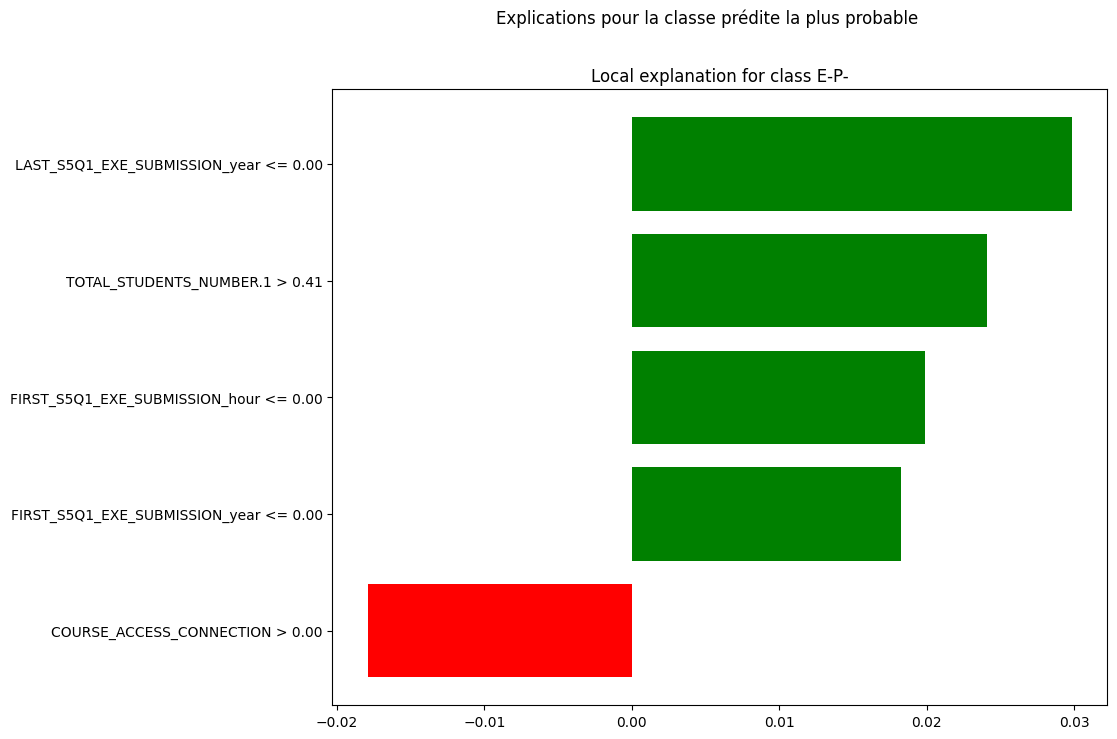

Fidélité locale pour l'instance 27 : 0.1600686340026518
Explication pour une instance :  E-P-
Probabilités prédites : [[0.00260684 0.163292   0.00260684 0.83149433]]
Classe prédite pour l'instance : E-P-


KeyboardInterrupt: 

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
instance_index = 27
for model in models :
    if model["name"] == "Extra Trees" :
        model["model"].fit(X_train, y_train)
        start_time = time.time()
        explanations = generate_explanations_LIME(model, instance_index)
        end_time = time.time()
        explanations_time = end_time - start_time
        print(explanations_time)


In [ ]:
import numpy as np
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
import warnings
import time


def generate_explanations_LIME(model_g, instance_indices):
    local_fidelities = []
    stability_scores_list = []

    name = model_g["name"]
    model = model_g["model"]

    explainer_lime = LimeTabularExplainer(X_train.values,
                                          feature_names=X_train.columns.tolist(),
                                          class_names=labels_source,
                                          mode='classification')

    for instance_index in instance_indices:
        print("Explication pour une instance : ", labels_source[int(y_test.values[instance_index])])

        exp = explainer_lime.explain_instance(X_test.iloc[instance_index].values, model.predict_proba, num_features=5, labels=labels_index)

        predicted_probabilities = model.predict_proba(X_test.iloc[instance_index].values.reshape(1, -1))
        print("Probabilités prédites :", predicted_probabilities)
        predicted_class_index = np.argmax(predicted_probabilities)
        predicted_class = labels_source[predicted_class_index]
        print("Classe prédite pour l'instance :", predicted_class)

        exp_predicted = explainer_lime.explain_instance(X_test.iloc[instance_index].values, model.predict_proba, num_features=5, labels=labels_index)
        exp_predicted.show_in_notebook(show_all=False)
        fig2 = exp_predicted.as_pyplot_figure(label=predicted_class_index)
        fig2.suptitle('Explications pour la classe prédite la plus probable')
        fig2.set_size_inches(10, 8)
        plt.show()

        local_fidelity = exp.score
        local_fidelities.append(local_fidelity)
        print(f"Fidélité locale pour l'instance {instance_index} : {local_fidelity}")

        exp_list = exp.as_list(label=predicted_class_index)

        colors = [colors_palette[1] if x[1] < 0 else colors_palette[0] for x in exp_list]

        fig, ax = plt.subplots(figsize=(10, 8))
        values = [x[1] for x in exp_list]
        features = [x[0] for x in exp_list]

        ax.barh(features, values, color=colors)
        ax.set_title(f'Explications pour la classe {predicted_class}')
        ax.set_xlabel('Importance')

        plt.show()


    overall_local_fidelity = np.mean(local_fidelities)

    print(f"Fidélité locale globale : {overall_local_fidelity}")

    return overall_local_fidelity




In [ ]:
# Pour les instances 27 et 23 avec le modèle le plus performant
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
instance_indices = [27, 23]
model = next(model for model in models if model["name"] == "Extra Trees")

model["model"].fit(X_train, y_train)
start_time = time.time()
overall_local_fidelity = generate_explanations_LIME(model, instance_indices)
end_time = time.time()
explanations_time = end_time - start_time
print(f"Temps d'explication : {explanations_time} secondes")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
instance_indices = [23, 27]
model = next(model for model in models if model["name"] == "Extra Trees")

model["model"].fit(X_train, y_train)
start_time = time.time()
overall_local_fidelity, overall_stability = generate_explanations_LIME(model, instance_indices)
end_time = time.time()
explanations_time = end_time - start_time
print(f"Temps d'explication : {explanations_time} secondes")

In [ ]:
# import shap
# import numpy as np

# def predict_specific_class(X, model, class_index):
#     proba = model.predict_proba(X)
#     return proba[:, class_index]

# def generate_explanations_SHAP(model_g, instance_index, class_index):
#     explanations = {}
#     print("Explication pour une instance : ", labels_source[int(y_test.values[instance_index])])

#     # SHAP explanations
#     model = model_g["model"]

#     # Prédire les probabilités pour l'instance spécifique
#     predicted_probabilities = model.predict_proba(X_test.iloc[instance_index].values.reshape(1, -1))
#     print("Probabilités prédites :", predicted_probabilities)
#     predicted_class_index = np.argmax(predicted_probabilities)
#     predicted_class = labels_source[predicted_class_index]
#     print("Classe prédite pour l'instance :", predicted_class)

#     # Fonction de prédiction pour la classe spécifique
#     model_specific_predict = lambda x: predict_specific_class(x, model, class_index)

#     # Créer l'explainer SHAP
#     explainer_shap = shap.KernelExplainer(model_specific_predict, X_train)

#     # Calculer les valeurs SHAP pour l'instance spécifique
#     shap_values = explainer_shap(X_test)

#     # Obtenir les valeurs SHAP pour l'instance spécifique et la classe spécifique
#     shap_values_instance_class = shap_values[instance_index]

#     # Afficher le diagramme waterfall pour l'instance et la classe spécifiques
#     shap.plots.waterfall(shap_values_instance_class)

#     # Afficher d'autres graphiques SHAP pour analyse globale
#     shap.plots.beeswarm(shap_values)
#     shap.plots.heatmap(shap_values)
#     shap.decision_plot(
#         explainer_shap.expected_value,
#         shap_values.values[instance_index],
#         feature_names=X_train.columns.tolist(),
#         link="logit",
#         highlight=0
#     )



In [ ]:
import shap
import numpy as np
from sklearn.metrics import pairwise_distances
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def predict_specific_class(X, model, class_index):
    proba = model.predict_proba(X)
    return proba[:, class_index]


def generate_explanations_SHAP(model_g, instance_index, class_index):
    explanations = {}
    print("Explication pour une instance : ", labels_source[int(y_test.values[instance_index])])

    model = model_g["model"]

    predicted_probabilities = model.predict_proba(X_test.iloc[instance_index].values.reshape(1, -1))
    print("Probabilités prédites :", predicted_probabilities)
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class = labels_source[predicted_class_index]
    print("Classe prédite pour l'instance :", predicted_class)

    model_specific_predict = lambda x: predict_specific_class(x, model, class_index)

    explainer_shap = shap.TreeExplainer(model)

    shap_values = explainer_shap.shap_values(X_test)

    shap_values_instance_class = shap_values[class_index][instance_index]

    feature_names = X_train.columns.tolist()





In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
instance_index = 23
for model in models :
    if model["name"] == "Extra Trees" :
        explanations = generate_explanations_SHAP(model, instance_index,3)



In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
instance_index = 27
for model in models :
    if model["name"] == "Extra Trees" :
        start_time = time.time()
        explanations = generate_explanations_SHAP(model, instance_index,3)
        end_time = time.time()
        explanations_time = end_time - start_time
        print(explanations_time)



In [ ]:
def generate_explanations_PFI(models_g):

    name = models_g["name"]
    model = models_g["model"]

    pfi_result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

    importances = pd.DataFrame({
        "Feature": X_train.columns,
        "Importance": pfi_result.importances_mean,
        "STD": pfi_result.importances_std
    })

    importances['Abs_Importance'] = importances['Importance'].abs()
    sorted_importances = importances.sort_values(by="Abs_Importance", ascending=False).head(10)

    return sorted_importances

def plot_top_features(sorted_importances):
    colors = [colors_palette[0] if importance >= 0 else colors_palette[1] for importance in sorted_importances['Importance']]

    plt.figure(figsize=(10, 6))
    plt.bar(
        sorted_importances['Feature'],
        sorted_importances['Importance'],
        yerr=sorted_importances['STD'],
        capsize=5,
        color=colors
    )
    plt.title('Les 10 caractéristiques les plus influentes')
    plt.xlabel('Features')
    plt.ylabel('Permutation Importance')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


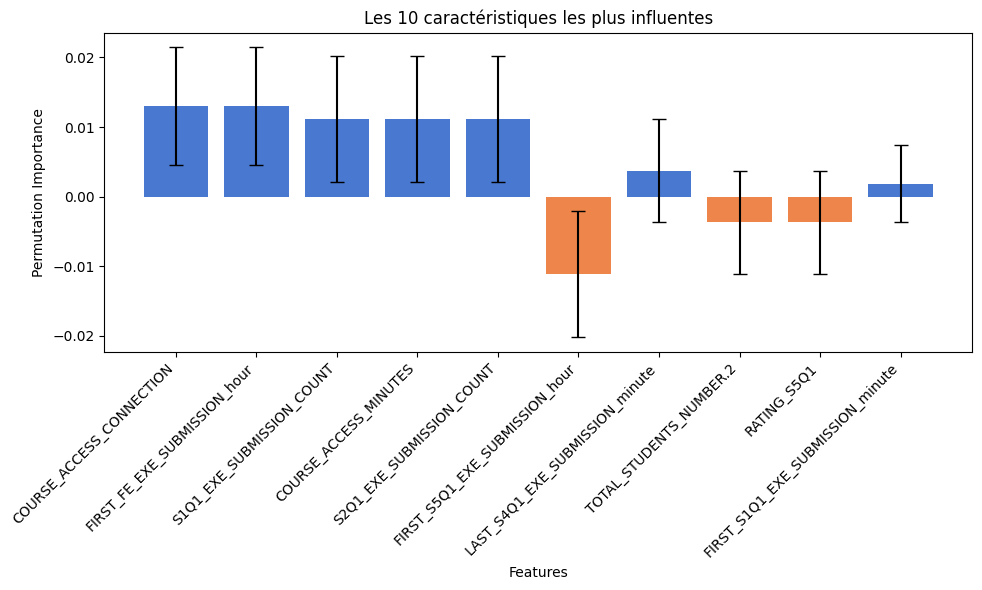

None
23.833657026290894


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
instance_index = 23
for model in models :
    if model["name"] == "Extra Trees" :
        start_time = time.time()
        sorted_importances = generate_explanations_PFI(model)
        plot_top_features(sorted_importances)

print(explanations)
end_time = time.time()
explanations_time = end_time - start_time
print(explanations_time)

In [ ]:
import numpy as np
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
import warnings

def generate_explanations_PFI(model_g):
    name = model_g["name"]
    model = model_g["model"]

    pfi_result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

    importances = pd.DataFrame({
        "Feature": X_train.columns,
        "Importance": pfi_result.importances_mean,
        "STD": pfi_result.importances_std
    })

    importances['Variance'] = np.var(pfi_result.importances, axis=1)
    importances['Abs_Importance'] = importances['Importance'].abs()
    sorted_importances = importances.sort_values(by="Abs_Importance", ascending=False).head(10)

    return sorted_importances

def plot_top_features(sorted_importances):
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_importances['Feature'], sorted_importances['Importance'], yerr=sorted_importances['STD'], capsize=5)
    plt.title('Les 10 caractéristiques les plus influentes')
    plt.xlabel('Features')
    plt.ylabel('Permutation Importance')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(sorted_importances['Feature'], sorted_importances['Variance'])
    plt.title('Stabilité des importances (Variance)')
    plt.xlabel('Features')
    plt.ylabel('Variance')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
model = next(model for model in models if model["name"] == "Extra Trees")

model["model"].fit(X_train, y_train)
sorted_importances = generate_explanations_PFI(model)
plot_top_features(sorted_importances)


###### Instance 1 = E-P-

In [ ]:
def generate_explanations_ANCHOR(model_g, data, instance_index):
    explanations = {}
    print("Explication pour une instance : ", labels_source[int(y_test.values[instance_index])])

    name = model_g["name"]

    model = model_g["model"]
    explainer_anchor = AnchorTabular(predictor=model.predict, feature_names=X_train.columns.tolist())
    explainer_anchor.fit(X_train.values)
    explanation = explainer_anchor.explain(X_test.values[instance_index])
    print("Anchor: {}".format(explanation.anchor))
    print("Precision: {:.2f}".format(explanation.precision))
    print("Coverage: {:.2f}".format(explanation.coverage))

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
instance_index = 23
for model in models :
    if model["name"] == "Extra Trees" :
        start_time = time.time()
        explanations = generate_explanations_ANCHOR(model, data['df_1'], instance_index)
        end_time = time.time()
        explanations_time = end_time - start_time
        print(explanations_time)


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
instance_index = 27
for model in models :
    if model["name"] == "Extra Trees" :
        explanations = generate_explanations_ANCHOR(model, data['df_1'], instance_index)



### ⬇ En dessous, le code est en cours d'écriture, ne pas prendre en compte pour le moment ⬇

In [ ]:
print(data['df_1'])

In [ ]:
print(df_og)

In [ ]:

df_og.drop(columns=['Category'],inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates

df_og = data['df_1']['df']

df_min = pd.DataFrame([df_og.min()], columns=df_og.columns)
df_max = pd.DataFrame([df_og.max()], columns=df_og.columns)
df_mean = pd.DataFrame([df_og.mean()], columns=df_og.columns)

df_min['Category'] = 'Minimum'
df_max['Category'] = 'Maximum'
df_mean['Category'] = 'Moyenne'

df_pierre = pd.DataFrame([df_og.loc[23]], columns=df_og.columns)
df_pierre['Category'] = 'Pierre'

df_oceanne = pd.DataFrame([df_og.loc[14]], columns=df_og.columns)
df_oceanne['Category'] = 'Océanne'

df_combined = pd.concat([df_pierre, df_oceanne, df_min, df_max, df_mean])

fig, ax = plt.subplots(figsize=(20, 6))
parallel_coordinates(df_combined, 'Category', colormap=plt.get_cmap("Set2"), linewidth=2)

plt.xticks(rotation=90, fontsize=8)
plt.title('Parallel Coordinates Plot pour Visualiser les Caractéristiques de Pierre et Océanne')
plt.legend(title='Catégorie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates

df_og = data['df_1']['df']

access_interactions = ['COURSE_ACCESS_CONNECTION', 'COURSE_ACCESS_MINUTES', 'COURSE_INTERACTIONS']
submission_counts = [col for col in df_og.columns if "COUNT" in col]
evaluations = [col for col in df_og.columns if "RATING" in col]
demographics = ['PUBLIC_BTS_SIO SLAM ', 'PUBLIC_E3IN ', 'PUBLIC_M2I,IA BIG DATA  ', 'PUBLIC_M2I_GREEN']
course_access_dates = [col for col in df_og.columns if "COURSE_ACCESS" in col]
nbr_student = [col for col in df_og.columns if "STUDENTS" in col]
date_submission = [col for col in df_og.columns if "SUBMISSION" in col and ("LAST" in col or "FIRST" in col)]

def create_parallel_plot(columns, title):
    df_filtered = df_og[columns]

    df_min = pd.DataFrame([df_filtered.min()], columns=columns)
    df_max = pd.DataFrame([df_filtered.max()], columns=columns)
    df_mean = pd.DataFrame([df_filtered.mean()], columns=columns)
    df_pierre = pd.DataFrame([df_filtered.loc[23]], columns=columns)
    df_oceanne = pd.DataFrame([df_filtered.loc[14]], columns=columns)


    df_min['Category'] = 'Minimum'
    df_max['Category'] = 'Maximum'
    df_mean['Category'] = 'Moyenne'
    df_pierre['Category'] = 'Pierre'
    df_oceanne['Category'] = 'Océanne'

    df_combined = pd.concat([df_pierre, df_oceanne, df_min, df_max, df_mean])

    fig, ax = plt.subplots(figsize=(15, 5))
    parallel_coordinates(df_combined, 'Category', colormap=plt.get_cmap("Set2"), linewidth=2)
    plt.title(title)
    plt.xticks(rotation=90, fontsize=8)
    plt.legend(title='Catégorie', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

create_parallel_plot(access_interactions, 'Accès et interactions du cours')
create_parallel_plot(submission_counts, 'Compte des soumissions d\'exercices')
create_parallel_plot(evaluations, 'Évaluations des sessions et de l\'examen final')
create_parallel_plot(demographics, 'Informations démographiques des participants')
create_parallel_plot(course_access_dates, 'Dates d\'accès aux cours')
create_parallel_plot(nbr_student, 'Nombre d étudiant au fil des rendus')
create_parallel_plot(date_submission, 'Date des remises d exercice et examen ')

In [ ]:
print(df_og['TOTAL_STUDENTS_NUMBER.1'])